In [1]:
import numpy as np
import pandas as pd 

In [2]:
df_train = pd.read_csv("../input/credit-dset/train.csv")

C:\Users\pchaw\AppData\Local\Temp\ipykernel_126712\403186247.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../input/credit-dset/train.csv")


Conversion of string to months

In [3]:
# string -> no of months
def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    else : 
        parts = age_str.split(' and ')
        years = int(parts[0].split()[0])
        months = int(parts[1].split()[0])
        total_months = (years * 12) + months
        return total_months

In [4]:

# Display summary statistics
print(df_train.describe())


       Base_Salary_PerMonth  Total_Bank_Accounts  Total_Credit_Cards  \
count          67968.000000         80000.000000        80000.000000   
mean            4189.211406            17.046287           22.175438   
std             3181.371100           116.953761          128.083595   
min              303.645417            -1.000000            0.000000   
25%             1623.664167             4.000000            4.000000   
50%             3086.683333             6.000000            5.000000   
75%             5950.863333             7.000000            7.000000   
max            15204.633333          1798.000000         1499.000000   

       Rate_Of_Interest  Delay_from_due_date  Total_Credit_Enquiries  \
count      80000.000000         80000.000000            78451.000000   
mean          72.261350            21.081663               28.153115   
std          466.370837            14.855210              194.812201   
min            1.000000            -5.000000                0.0

This code is same as the one in pre-processing only change is that we are not dropping loantype since we are doing some EDA on it.

In [5]:
# dropping columns
df_train = df_train.drop(['Name','ID'], axis=1)
# base salary -> number
df_train['Base_Salary_PerMonth'] = pd.to_numeric(df_train['Base_Salary_PerMonth'],downcast = 'float',errors = 'coerce')
# Total delayed payments (removing underscores if present) -> number
df_train['Total_Delayed_Payments'] = df_train['Total_Delayed_Payments'].str.replace(r'[^-0-9]', '', regex=True)
df_train['Total_Delayed_Payments'] = pd.to_numeric(df_train['Total_Delayed_Payments'],downcast = 'float',errors = 'coerce')
# credit history age -> number (to no of months)
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_to_months)
df_train['Credit_History_Age'] = pd.to_numeric(df_train['Credit_History_Age'],downcast = 'float',errors = 'coerce')
#age -> number
df_train['Age'] = df_train['Age'].str.replace(r'[^-0-9]', '', regex=True)
df_train['Age'] = pd.to_numeric(df_train['Age'],downcast = 'integer',errors = 'coerce')
#Income_annual -> number
df_train['Income_Annual'] = df_train['Income_Annual'].str.replace(r'[^-.0-9]', '', regex=True)
df_train['Income_Annual'] = pd.to_numeric(df_train['Income_Annual'],downcast = 'float',errors = 'coerce')
#Total_Current_Loans -> number
df_train['Total_Current_Loans'] = df_train['Total_Current_Loans'].str.replace(r'[^-0-9]', '', regex=True)
df_train['Total_Current_Loans'] = pd.to_numeric(df_train['Total_Current_Loans'],downcast = 'integer',errors = 'coerce')
#Current_Debt_Outstanding -> number
df_train['Current_Debt_Outstanding'] = df_train['Current_Debt_Outstanding'].str.replace(r'[^-.0-9]', '', regex=True)
df_train['Current_Debt_Outstanding'] = pd.to_numeric(df_train['Current_Debt_Outstanding'],downcast = 'float',errors = 'coerce')
#Credit_Limit -> number
df_train['Credit_Limit'] = pd.to_numeric(df_train['Credit_Limit'],downcast = 'float',errors = 'coerce')
#Monthly_Balance -> number
df_train['Monthly_Balance'] = pd.to_numeric(df_train['Monthly_Balance'],downcast = 'float',errors = 'coerce')

Dropping duplicates

In [6]:
df_train.drop_duplicates(inplace=True)
print(df_train.isna().sum().to_string())
df_train.columns = [column.lower() for column in df_train.columns]
print(df_train.shape)

Customer_ID                     0
Month                           0
Age                             0
Number                          0
Profession                      0
Income_Annual                   0
Base_Salary_PerMonth        12032
Total_Bank_Accounts             0
Total_Credit_Cards              0
Rate_Of_Interest                0
Total_Current_Loans             0
Loan_Type                    9157
Delay_from_due_date             0
Total_Delayed_Payments       5595
Credit_Limit                 1691
Total_Credit_Enquiries       1549
Credit_Mix                      0
Current_Debt_Outstanding        0
Ratio_Credit_Utilization        0
Credit_History_Age           7240
Payment_of_Min_Amount           0
Per_Month_EMI                   0
Monthly_Investment           3605
Payment_Behaviour               0
Monthly_Balance               957
Credit_Score                    0
(80000, 26)


Just checking null values in rate_of_interest and total_bank_accounts and then showing number of credit cards and total bank accounts by customerid. Also plotting interest rate and total bank accounts using density plot for EDA

0
0
int64
customer_id  total_bank_accounts  total_credit_cards
CUS_0x1000   6                    5                     6
CUS_0x1009   6                    5                     6
CUS_0x100b   1                    4                     4
CUS_0x1011   3                    3                     8
CUS_0x1013   3                    3                     6
CUS_0x1015   7                    4                     6
CUS_0x1018   7                    7                     5
CUS_0x1026   2                    6                     8
CUS_0x102d   5                    3                     5
             1000                 3                     1
CUS_0x102e   8                    4                     7
CUS_0x1032   4                    7                     6
CUS_0x1037   5                    4                     6
CUS_0x1038   3                    4                     6
CUS_0x103e   4                    6                     8
CUS_0x1041   8                    8                     6
CUS_0x104

C:\Users\pchaw\AppData\Local\Temp\ipykernel_126712\3383122794.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['rate_of_interest'] < 500]['rate_of_interest'], shade=True, color="purple")


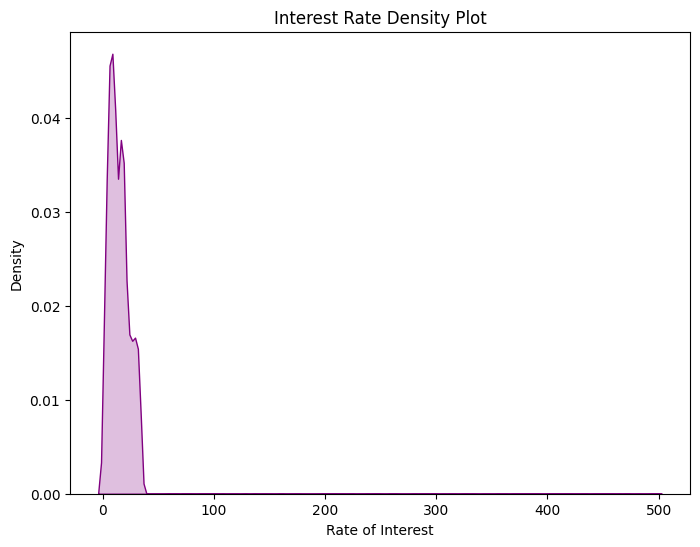

C:\Users\pchaw\AppData\Local\Temp\ipykernel_126712\3383122794.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['total_bank_accounts'] < 80]['total_bank_accounts'], shade=True, color="purple")


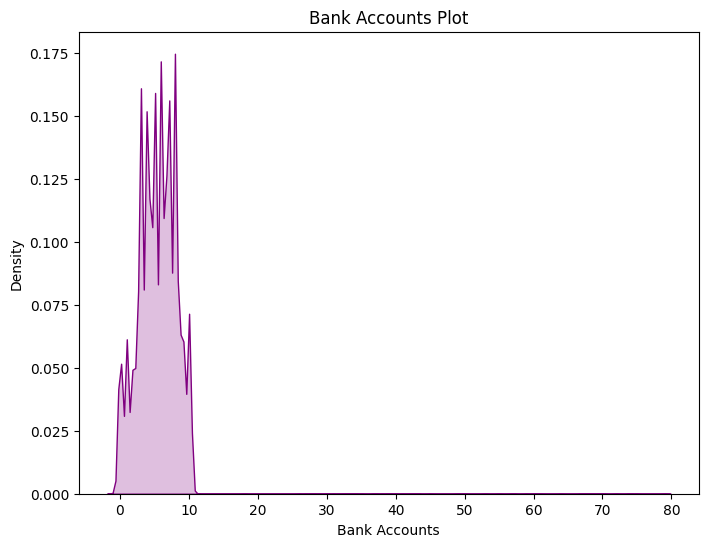

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df_train["total_bank_accounts"].value_counts().sort_index().head(20) 

print(df_train['rate_of_interest'].isnull().sum())

print(df_train["total_bank_accounts"].isnull().sum())
print(df_train['rate_of_interest'].dtype)



print(df_train.groupby(["customer_id"])[["total_bank_accounts",
                              "total_credit_cards"]].value_counts().head(20))


plt.figure(figsize=(8, 6))
sns.kdeplot(df_train[df_train['rate_of_interest'] < 500]['rate_of_interest'], shade=True, color="purple")
plt.title("Interest Rate Density Plot")
plt.xlabel("Rate of Interest")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df_train[df_train['total_bank_accounts'] < 80]['total_bank_accounts'], shade=True, color="purple")
plt.title("Bank Accounts Plot")
plt.xlabel("Bank Accounts")
plt.show()


printing total current loans

In [8]:


df_train[pd.to_numeric(df_train["total_current_loans"], errors="coerce").isna()]["total_current_loans"].head(20)


# df_train["total_current_loans"] = df_train["total_current_loans"].str.strip("_")

df_train["total_current_loans"] = pd.to_numeric(df_train["total_current_loans"], downcast="integer")

df_train["total_current_loans"].dtype

print(df_train["total_current_loans"].value_counts().sort_index().head(20))


total_current_loans
-100     3114
 0       8768
 1       8498
 2      12032
 3      12131
 4      11714
 5       5698
 6       6246
 7       5889
 8       2531
 9       2976
 17         1
 18         1
 23         2
 27         1
 29         1
 31         2
 32         1
 33         2
 49         2
Name: count, dtype: int64


Grouping loantype with corresponding customerId and also printing various credit rating counts i.e standard,good, and bad. Then just printing corresponding credit_class with customerId

In [9]:
print(df_train.groupby("customer_id")["loan_type"].value_counts().sample(20))

df_train.groupby("customer_id")["loan_type"].value_counts().value_counts()


print(df_train.credit_mix.value_counts())

df_train[["customer_id", "credit_mix"]].head(20)



customer_id  loan_type                                                                                                                                               
CUS_0xa7cd   Payday Loan                                                                                                                                                 7
CUS_0x112e   Home Equity Loan, Home Equity Loan, Personal Loan, and Auto Loan                                                                                            7
CUS_0x5e33   Mortgage Loan, Payday Loan, Credit-Builder Loan, and Auto Loan                                                                                              7
CUS_0x4717   Auto Loan, and Credit-Builder Loan                                                                                                                          6
CUS_0x78ab   Debt Consolidation Loan, Personal Loan, and Personal Loan                                                                                

,customer_id,credit_mix
0,CUS_0x2dbf,Standard
1,CUS_0x8167,_
2,CUS_0x3a0b,Good
3,CUS_0x9a4b,Standard
4,CUS_0x253a,Bad
5,CUS_0x318e,Standard
6,CUS_0xc6cc,_
7,CUS_0xc18f,Good
8,CUS_0x797d,Standard
9,CUS_0x2abb,Bad


Removing underscores from credit_mix and imputing with mode and after that plotting a pie chart to explore the distribution of the three credit classes

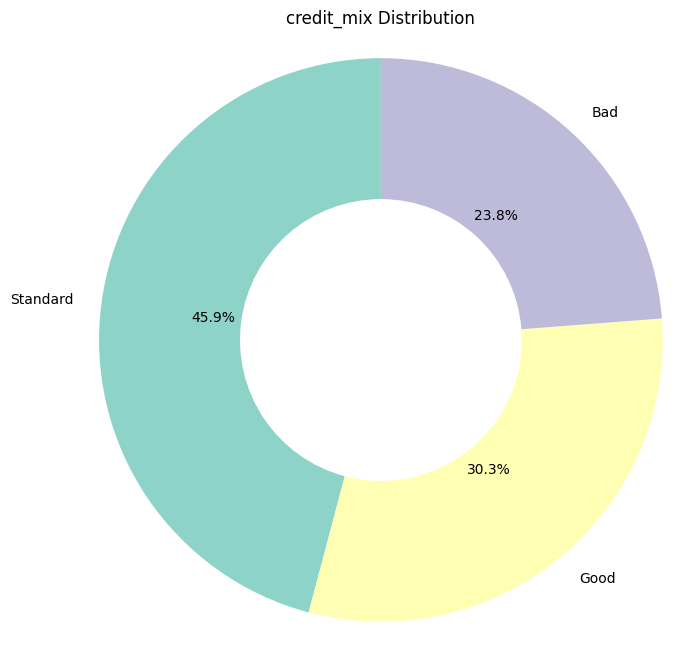

In [10]:


df_train.loc[df_train["credit_mix"] == "_", "credit_mix"] = pd.NA

df_train["credit_mix"] = df_train.groupby("customer_id")["credit_mix"].transform(
    lambda x: x.fillna(x.mode()[0]))

df_train["credit_mix"].isna().sum()
plt.figure(figsize=(8, 8))
plt.pie(df_train["credit_mix"].value_counts(),
        labels=df_train["credit_mix"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("credit_mix Distribution")
plt.axis('equal')
plt.show()

Making a correlation Matrix between numeric features

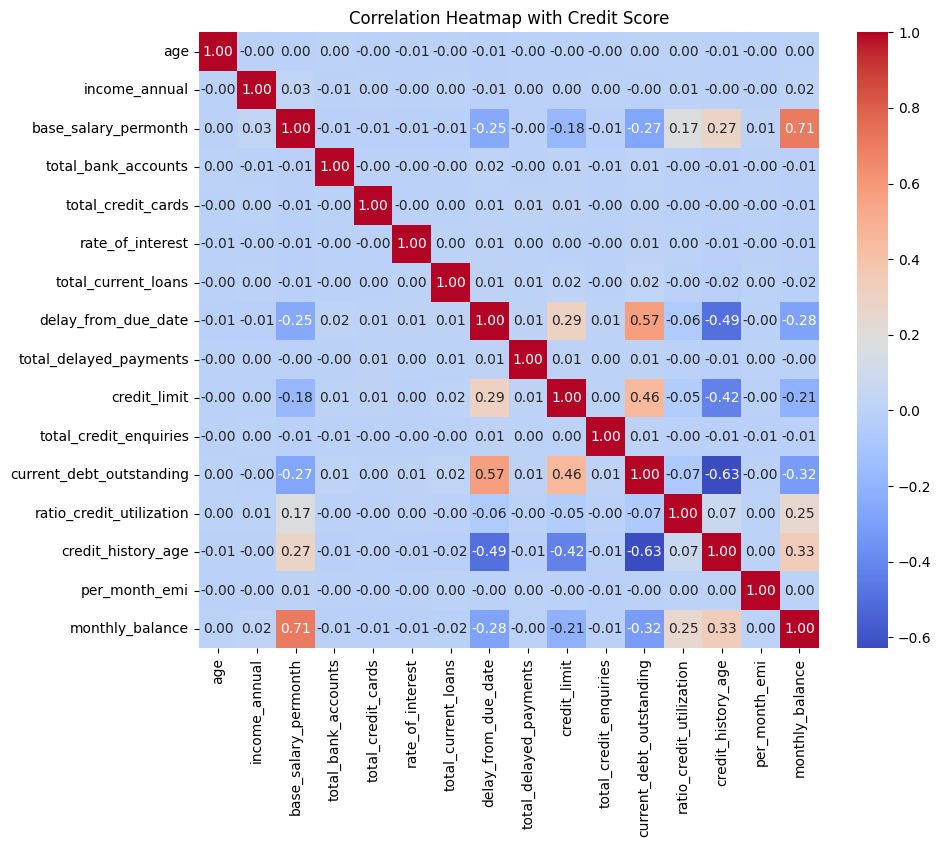

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               80000 non-null  object 
 1   month                     80000 non-null  object 
 2   age                       80000 non-null  int16  
 3   number                    80000 non-null  object 
 4   profession                80000 non-null  object 
 5   income_annual             80000 non-null  float64
 6   base_salary_permonth      67968 non-null  float32
 7   total_bank_accounts       80000 non-null  int64  
 8   total_credit_cards        80000 non-null  int64  
 9   rate_of_interest          80000 non-null  int64  
 10  total_current_loans       80000 non-null  int16  
 11  loan_type                 70843 non-null  object 
 12  delay_from_due_date       80000 non-null  int64  
 13  total_delayed_payments    74405 non-null  float32
 14  credit

In [11]:


numeric_df =df_train.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()


df_train.info()


Printing counts of each month and age

In [12]:
print(df_train["month"].value_counts())  
df_train.groupby(["customer_id"]).age.value_counts().head(20)  
print(df_train.age.value_counts().sort_index().head(20))
print(df_train.customer_id.value_counts())

df_train.profession.value_counts()

month
June        10035
August      10025
July        10013
January     10013
May          9999
April        9987
February     9985
March        9943
Name: count, dtype: int64
age
-500     701
 14      952
 15     1241
 16     1170
 17     1204
 18     1900
 19     2244
 20     2194
 21     2184
 22     2256
 23     2115
 24     2187
 25     2322
 26     2348
 27     2242
 28     2360
 29     2188
 30     2189
 31     2362
 32     2307
Name: count, dtype: int64
customer_id
CUS_0x4a7     8
CUS_0xaf56    8
CUS_0x8bdf    8
CUS_0x66f5    8
CUS_0xb88c    8
             ..
CUS_0x9771    2
CUS_0xb7a5    2
CUS_0x6556    2
CUS_0x387d    2
CUS_0x9daa    2
Name: count, Length: 12500, dtype: int64


profession
_______          5691
Lawyer           5273
Architect        5100
Mechanic         5095
Engineer         5067
Scientist        5044
Accountant       5007
Teacher          4990
Media_Manager    4959
Developer        4946
Journalist       4909
Entrepreneur     4857
Doctor           4843
Manager          4810
Musician         4717
Writer           4692
Name: count, dtype: int64

Grouping customerId by proffession and plotting a pie chart of showing the distribution of all various proffessions.

customer_id  profession   
CUS_0x1000   Lawyer           6
CUS_0x1009   Mechanic         5
             _______          1
CUS_0x100b   Media_Manager    4
CUS_0x1011   Doctor           8
CUS_0x1013   Mechanic         6
CUS_0x1015   Journalist       6
CUS_0x1018   Accountant       5
CUS_0x1026   Manager          7
             _______          1
CUS_0x102d   Entrepreneur     5
             _______          1
CUS_0x102e   Scientist        7
CUS_0x1032   Lawyer           6
CUS_0x1037   Accountant       6
CUS_0x1038   Architect        6
CUS_0x103e   Scientist        8
CUS_0x1041   Teacher          6
CUS_0x1044   Entrepreneur     7
             _______          1
CUS_0x1048   Accountant       6
CUS_0x104a   Mechanic         6
CUS_0x104e   Teacher          7
             _______          1
CUS_0x104f   Architect        6
             _______          1
CUS_0x1051   Engineer         7
             _______          1
CUS_0x1056   Entrepreneur     7
CUS_0x1057   Writer           6
Name: count, 

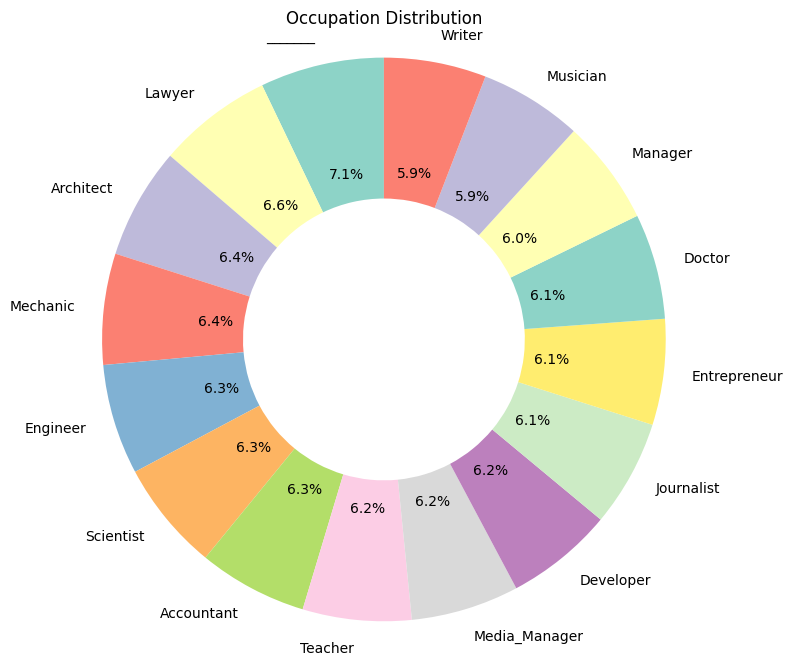

In [13]:

print(df_train.groupby("customer_id")["profession"].value_counts().head(30))
plt.figure(figsize=(8, 8))
plt.pie(df_train["profession"].value_counts(),
        labels=df_train["profession"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("Occupation Distribution")
plt.axis('equal')
plt.show()

Using a histogram to plot emi_per_month

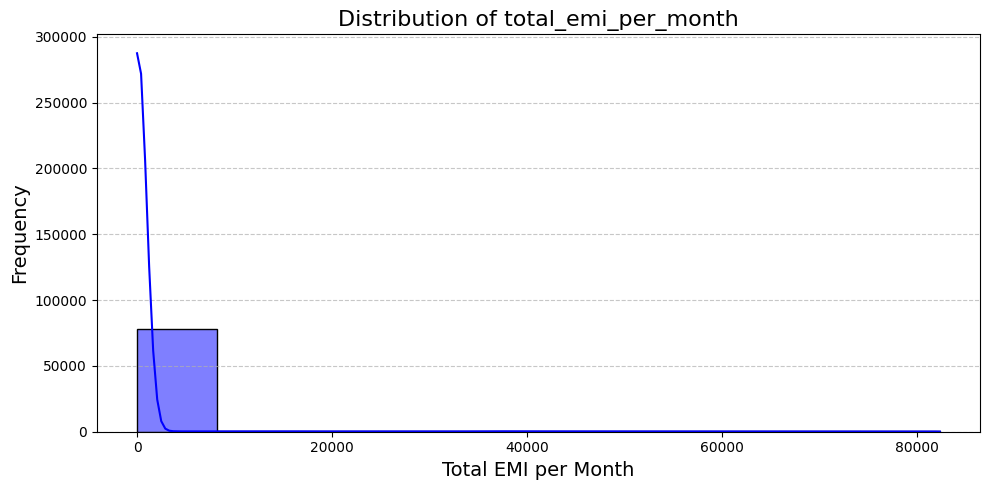

In [14]:


plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x="per_month_emi", bins=10, kde=True, color='blue')

plt.title('Distribution of total_emi_per_month', fontsize=16)
plt.xlabel('Total EMI per Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




Displaying a sample of 20 value counts in the column current_debt_outstanding and downcasting it and converting null values to numeric

In [15]:
df_train.current_debt_outstanding.value_counts().sample(20)

print(df_train[pd.to_numeric(df_train["current_debt_outstanding"],
                  errors="coerce").isna()]["current_debt_outstanding"].head(20))

# df_train["current_debt_outstanding"] = df_train["current_debt_outstanding"].str.strip("_")  # remove "_"
df_train["current_debt_outstanding"] = pd.to_numeric(df_train["current_debt_outstanding"],
                                        downcast="float")
print(df_train["current_debt_outstanding"].dtype)

df_train.current_debt_outstanding.value_counts().sort_index().head(20)

Series([], Name: current_debt_outstanding, dtype: float32)
float32


current_debt_outstanding
0.23     8
0.34     6
0.54     6
0.56     6
0.77     5
0.95    12
1.20     6
1.23     7
1.30     7
1.33     6
1.37     8
1.42     7
1.48     6
2.04     8
2.13     8
2.43     7
3.31     8
3.50     4
3.68     8
3.74     7
Name: count, dtype: int64